<a href="https://colab.research.google.com/github/dougscohen/DS-Unit-1-Sprint-2-Statistics/blob/master/module2/LS_DS_122_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [11]:
# Import Numpy and Pandas

import numpy as np
import pandas as pd

# load in the dataset

column_headers = ['Class Name','handicapped-infants', 
                  'water-project-cost-sharing', 
                  'adoption-of-the-budget-resolution', 'physician-fee-freeze', 
                  'el-salvador-aid', 'religious-groups-in-schools', 
                  'anti-satellite-test-ban', 'aid-to-nicaraguan-contras', 
                  'mx-missile', 'immigration', 'synfuels-corporation-cutback', 
                  'education-spending' , 'superfund-right-to-sue', 'crime', 
                  'duty-free-exports', 'export-administration-act-south-africa']

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data', names=column_headers)

df.head()

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [30]:
# Change values to numbers

import numpy as np

df = df.replace({'y': 1, 'n': 0, '?': np.NaN})

df.head()

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [31]:
# Create a subset of the dataset that is just Republicans

rep = df[df['Class Name'] == 'republican']

rep.head()

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
7,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,1.0
8,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
10,republican,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,1.0,0.0,0.0


In [32]:
# Create a subset of the dataset that is just Democrats

dem = df[df['Class Name'] == 'democrat']

dem.head()

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0
5,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
6,democrat,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0


In [0]:
# Create confidence interval function

def confidence_interval(sample, confidence=0.95):
  """
  Calculate a confidence interval around a sample mean for given data.
  Using t-distribution and two-tailed test, default 95% confidence. 
  
  Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval
  
  Returns:
    tuple of (mean, lower bound, upper bound)
  """
  # NumPy Arrays are your friend
  sample = np.array(sample)
  # What is my estimate  - the mean
  mean = np.mean(sample)
  # Sample Size
  n = len(sample)
  # standard error
  # stderr = stats.sem(data)
  # I want the sample standard deviation
  stderr = np.std(sample, ddof=1) / np.sqrt(n)
  # Look up the t-statistic that contains 95% of possible sample means
  # within its bounds
  t = stats.t.ppf((1 + confidence) / 2.0, n - 1)
  # Margin Of Error
  margin_of_error = t * stderr
  return mean - margin_of_error, mean, mean + margin_of_error

In [40]:
# Get a subset of just the crime column so that I can drop NaN values

crime_subset = df['crime']

crime_subset.head()

0    1.0
1    1.0
2    1.0
3    0.0
4    1.0
Name: crime, dtype: float64

In [42]:
crime_subset.isnull().sum()

17

In [46]:
# Drop NaN values so that we can generate the confidence interval (need a mean)
# Can't do that with NaN values present

crime_subset = crime_subset.dropna()

print(crime_subset.shape)
crime_subset.head()

(418,)


0    1.0
1    1.0
2    1.0
3    0.0
4    1.0
Name: crime, dtype: float64

In [47]:
# Get the confidence interval

confidence_interval(crime_subset)

(0.546017195315226, 0.5933014354066986, 0.6405856754981711)

In [0]:
# Assign confidence interval of the crime subset to a variable

CI_crime = confidence_interval(crime_subset)

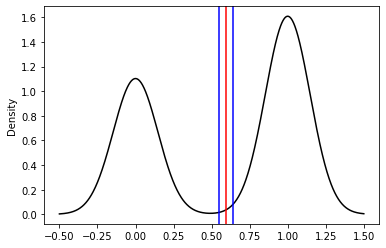

In [56]:
# Plot the crime subset confidence interval using with a density plot

crime_subset.plot.density(color='k')
plt.axvline(CI_crime[0], color='blue')
plt.axvline(CI_crime[1], color='red')
plt.axvline(CI_crime[2], color='blue')
plt.show()

In [53]:
# Subset the crime votes for just Republicans

rep_crime_subset = rep['crime']

print(rep_crime_subset.shape)
rep_crime_subset.head()

(168,)


0     1.0
1     1.0
7     1.0
8     1.0
10    1.0
Name: crime, dtype: float64

In [60]:
# Drop the NaN values so that I can calculate a confidence interval

rep_crime_subset = rep_crime_subset.dropna()

print(rep_crime_subset.shape)
rep_crime_subset.head()

(161,)


0     1.0
1     1.0
7     1.0
8     1.0
10    1.0
Name: crime, dtype: float64

In [54]:
# Subset the crime votes for just Democrats

dem_crime_subset = dem['crime']

print(dem_crime_subset.shape)
dem_crime_subset.head()

(267,)


2    1.0
3    0.0
4    1.0
5    1.0
6    1.0
Name: crime, dtype: float64

In [61]:
# Drop the NaN values so that I can calculate a confidence interval

dem_crime_subset = dem_crime_subset.dropna()

print(dem_crime_subset.shape)
dem_crime_subset.head()

(257,)


2    1.0
3    0.0
4    1.0
5    1.0
6    1.0
Name: crime, dtype: float64

In [62]:
# Get the confidence interval

confidence_interval(rep_crime_subset)

(0.960253517544598, 0.9813664596273292, 1.0024794017100602)

In [0]:
# Assign confidence interval of the republican crime subset to a variable

CI_rep_crime = confidence_interval(rep_crime_subset)

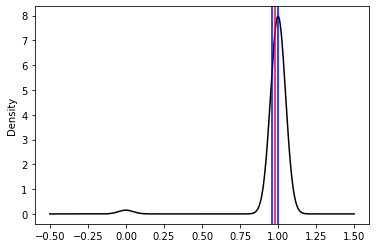

In [64]:
# plot the confidence interval with upper bound, mean, and lower bound

rep_crime_subset.plot.density(color='k')
plt.axvline(CI_rep_crime[0], color='blue')
plt.axvline(CI_rep_crime[1], color='red')
plt.axvline(CI_rep_crime[2], color='blue')
plt.show()

In [0]:
# Assign confidence interval of the democrat crime subset to a variable

CI_dem_crime = confidence_interval(dem_crime_subset)

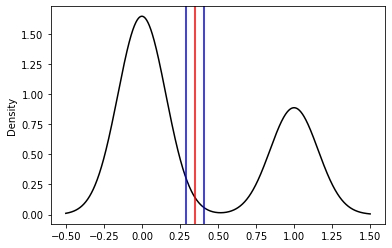

In [68]:
# plot the confidence interval with upper bound, mean, and lower bound

dem_crime_subset.plot.density(color='k')
plt.axvline(CI_dem_crime[0], color='blue')
plt.axvline(CI_dem_crime[1], color='red')
plt.axvline(CI_dem_crime[2], color='blue')
plt.show()

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy

In [73]:
# import automobiles dataset

column_names = ['symboling', 'normalized-losses', 'make', 'fuel-type', 
                'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 
                'engine-location', 'wheel-base', 'length', 'width', 'height', 
                'curb-weight', 'engine-type', 'num-of-cylinders', 
                'engine-size', 'fuel-system', 'bore', 'stroke', 
                'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 
                'highway-mpg', 'price']

cars = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data', names=column_names)

cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [74]:
cars['drive-wheels'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drive-wheels, dtype: int64

In [75]:
cars['num-of-cylinders'].value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: num-of-cylinders, dtype: int64

In [76]:
# make a contingency table using pd.crosstab with two categorical variables

contingency_table = pd.crosstab(cars['drive-wheels'], cars['num-of-cylinders'], margins=True, margins_name='Total')

contingency_table

num-of-cylinders,eight,five,four,six,three,twelve,two,Total
drive-wheels,,,,,,,,
4wd,0,2,7,0,0,0,0,9
fwd,0,5,111,3,1,0,0,120
rwd,5,4,41,21,0,1,4,76
Total,5,11,159,24,1,1,4,205


In [78]:
# Expected value calculation

row_sums = contingency_table.iloc[0:3, 7].values
col_sums = contingency_table.iloc[3, 0:7].values

print(row_sums)
print(col_sums)

[  9 120  76]
[  5  11 159  24   1   1   4]


In [84]:
total_sums = contingency_table.iloc[3, 7]

total_sums

205

In [85]:
expected = []
for i in range(len(row_sums)):
  expected_row = []
  for column in col_sums:
    expected_val = column*row_sums[i]/total_sums
    expected_row.append(expected_val)
  expected.append(expected_row)

expected = np.array(expected)
print(expected.shape)  
print(expected)

(3, 7)
[[2.19512195e-01 4.82926829e-01 6.98048780e+00 1.05365854e+00
  4.39024390e-02 4.39024390e-02 1.75609756e-01]
 [2.92682927e+00 6.43902439e+00 9.30731707e+01 1.40487805e+01
  5.85365854e-01 5.85365854e-01 2.34146341e+00]
 [1.85365854e+00 4.07804878e+00 5.89463415e+01 8.89756098e+00
  3.70731707e-01 3.70731707e-01 1.48292683e+00]]


In [86]:
observed = pd.crosstab(cars['drive-wheels'], cars['num-of-cylinders']).values

print(observed.shape)
observed

(3, 7)


array([[  0,   2,   7,   0,   0,   0,   0],
       [  0,   5, 111,   3,   1,   0,   0],
       [  5,   4,  41,  21,   0,   1,   4]])

In [87]:
chi_squared = ((observed - expected)**2/(expected)).sum() 
print(f"Chi-Squared: {chi_squared}")

Chi-Squared: 57.89238112045646


In [0]:
from scipy import stats

In [89]:
# Run a chi-squared test in one line using Scipy

stats.chi2_contingency(observed)

(57.89238112045646,
 5.4515053312469285e-08,
 12,
 array([[2.19512195e-01, 4.82926829e-01, 6.98048780e+00, 1.05365854e+00,
         4.39024390e-02, 4.39024390e-02, 1.75609756e-01],
        [2.92682927e+00, 6.43902439e+00, 9.30731707e+01, 1.40487805e+01,
         5.85365854e-01, 5.85365854e-01, 2.34146341e+00],
        [1.85365854e+00, 4.07804878e+00, 5.89463415e+01, 8.89756098e+00,
         3.70731707e-01, 3.70731707e-01, 1.48292683e+00]]))

## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)